In [5]:
!sudo apt update
!sudo apt install openjdk-17-jdk -y
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc!sudo apt update
!sudo apt install openjdk-17-jdk -y
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc

!pip install konlpy

!pip install gensim

!apt-get update

# MeCab 본체 + 라이브러리
!apt-get install -y mecab libmecab-dev

# 한국어 MeCab (mecab-ko + mecab-ko-dic)
!apt-get install -y mecab-ko mecab-ko-dic

# 파이썬 바인딩 + konlpy
!pip install konlpy mecab-python3

!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash

# 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Hit:1 http://archive.ubuntu.com/ubuntu noble InRelease
Hit:2 http://security.ubuntu.com/ubuntu noble-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu noble-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu noble-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
71 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-17-jdk is already the newest version (17.0.16+8~us1-0ubuntu1~24.04.1).
0 upgraded, 0 newly installed, 0 to remove and 71 not upgraded.
/bin/bash: line 1: /home/jovyan/.bashrc!sudo: No such file or directory
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-17-jdk is already the newest version (17.0.16+8~us1-0ubuntu1~24.04.1).
0 upgraded, 0 newly installed, 0 to remove and 71 not upgraded.
Reading package lists... Done
E: 

In [12]:
# MeCab으로 명사만 뽑아서 토큰화

from konlpy.tag import Mecab
# 임베딩 모델 
from gensim.models import Word2Vec
import os

import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

# 단어 추출
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

0.6.0
4.4.0
1.7.0
0.13.2


In [55]:
genre_txt = ['synopsis_action.txt', 'synopsis_adult.txt', 'synopsis_adventure.txt', 'synopsis_animation.txt',
            'synopsis_comedy.txt', 'synopsis_crime.txt', 'synopsis_documentary.txt', 'synopsis_drama.txt',
            'synopsis_etc.txt', 'synopsis_family.txt', 'synopsis_fantasy.txt', 'synopsis_historical.txt',
            'synopsis_horror.txt', 'synopsis_musical.txt', 'synopsis_mystery.txt', 'synopsis_romance.txt',
            'synopsis_SF.txt', 'synopsis_show.txt', 'synopsis_thriller.txt', 'synopsis_war.txt',
            'synopsis_western.txt', 'synopsis_art.txt', 'synopsis_gen.txt']
genre_name = ['action', 'adult', 'adventure', 'animation',
             'comedy', 'crime', 'documentary', 'drama',
             'etc', 'family', 'fantasy', 'historical',
             'horror', 'musical', 'mystery', 'romance',
             'SF', 'show', 'thriller', 'war',
              'western', 'art', 'gen'
             ]

print("슝~")

슝~


In [56]:
# 파일 읽고 토큰화 하기

data_dir = os.path.join(os.getenv("HOME"), "work/weat/data")
def read_token(file_name):
    mecab = Mecab()
    result = []  # 문장들의 리스트
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break

            tokens = []  # 한 문장의 토큰들
            tokenlist = mecab.pos(line)
            for word in tokenlist:
                if word[1] in ["NNG"]: #NNG : 일반 명사  (고유 명사 ,의존명사는 제외)
                    result.append((word[0]))

            if tokens:  # 토큰이 있는 문장만 추가
                result.append(tokens)
    
    return result


# MeCab의 품사 태그는: # 일반 명사: NNG # 고유 명사: NNP # 의존 명사: NNB


In [57]:
# 모든장르의 코퍼스
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


# --- 2. Word2Vec 학습 ---
Word2Vec은 입력으로 [ ['token', 'token'], ['token', 'token'] ] 형태를 받습니다. (genre 변수 그대로 사용)

In [58]:
%%time

# word2vec
from gensim.models import Word2Vec
# Word2Vec 모델 학습
model = Word2Vec(
    sentences=genre,      # 문장들의 리스트
    vector_size=100,      # 임베딩 벡터 차원
    window=5,             # 문맥 윈도우 크기
    min_count=5,          # 최소 등장 횟수
    workers=4,            # 병렬 처리
    sg=1                 # 0: CBOW, 1: Skip-gram
)

print("모델 학습 완료!")
print(f'학습된 단어 수: {len(model.wv)}')
model.wv.most_similar(positive=['영화'])


모델 학습 완료!
학습된 단어 수: 17179
CPU times: user 10.2 s, sys: 72.8 ms, total: 10.3 s
Wall time: 4.86 s


[('출연', 0.9615838527679443),
 ('형식', 0.9524251222610474),
 ('배우', 0.9503735303878784),
 ('원작', 0.9484875798225403),
 ('감독', 0.9412471652030945),
 ('작품', 0.9389514923095703),
 ('인터뷰', 0.9379099607467651),
 ('바탕', 0.937265932559967),
 ('주제', 0.9355347156524658),
 ('스토리', 0.9355021715164185)]

In [59]:
model.wv.most_similar(positive=['사랑'])

[('연인', 0.9195412993431091),
 ('만남', 0.9048195481300354),
 ('고백', 0.9021053910255432),
 ('가슴', 0.8963465094566345),
 ('순수', 0.8962064385414124),
 ('재회', 0.8954867124557495),
 ('진심', 0.8867628574371338),
 ('아픔', 0.8858060240745544),
 ('우정', 0.8857031464576721),
 ('인생', 0.8812718987464905)]

# 장르별 대표 단어를 추출

코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정하기 위하여 TF-IDF방식을 사용한다.

In [60]:
# --- 3. TF-IDF 수행 ---
# TfidfVectorizer는 입력으로 ['text text', 'text text'] 형태의 문자열 리스트를 받습니다.
# 따라서 genre(리스트의 리스트)를 문자열 리스트로 변환해야 합니다.

# [' '.join(tokens) for tokens in genre] 구문을 사용하여
# [['영화', '액션'], ['사랑', '로맨스']] -> ["영화 액션", "사랑 로맨스"] 로 변환
genre_str = [' '.join(tokens) for tokens in genre]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre_str)

print("\n[TF-IDF Result]")
print(X.shape)


[TF-IDF Result]
(23, 28044)


In [61]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

action: 자신, 시작, 조직, 사건, 사람, 경찰, 친구, 세계, 요원, 목숨, 전쟁, 거대, 가족, 임무, 비밀, 
adult: 남편, 성애, 자신, 관계, 남자, 섹스, 영화, 정사, 여자, 시작, 친구, 유부녀, 마음, 사랑, 에피소드, 
adventure: 자신, 시작, 친구, 영화, 마을, 아이, 세계, 아버지, 사람, 여행, 가족, 세상, 윈치, 모험, 비밀, 
animation: 애니메이션, 국제, 영화제, 친구, 자신, 깨미, 사람, 시작, 페스티벌, 이야기, 아이, 세계, 마을, 소녀, 남자, 
comedy: 자신, 친구, 시작, 사랑, 영화, 남자, 사람, 여자, 영화제, 가족, 마을, 사건, 이야기, 인생, 마음, 
crime: 사건, 자신, 경찰, 시작, 범죄, 조직, 살인, 사람, 마약, 남자, 형사, 수사, 여자, 발견, 범인, 
documentary: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 감독, 자신, 세계, 여성, 시작, 가족, 환경, 작품, 
drama: 자신, 영화제, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 아버지, 
etc: 영화제, 국제, 단편, 영화, 자신, 사람, 이야기, 남자, 여자, 친구, 사랑, 시작, 페스티벌, 미디어, 엄마, 
family: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 사랑, 아들, 마을, 국제, 할머니, 사람, 학교, 
fantasy: 자신, 시작, 사랑, 사람, 요괴, 영화, 영화제, 이야기, 세계, 인간, 남자, 소녀, 세상, 마을, 국제, 
historical: 시작, 사랑, 자신, 신기전, 춘향, 아가멤논, 황제, 루안, 채선, 운명, 사람, 최고, 전쟁, 권력, 정조, 
horror: 친구, 시작, 사람, 자신, 사건, 공포, 발견, 죽음, 남자, 마을, 영화, 이상, 여자, 가족, 악령, 
musical: 뮤지컬, 사랑, 영화, 지모도, 음악, 자신, 카바, 영화제, 시작, 시앙치, 토스카, 최

In [62]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [72]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b
    
def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

0.226


In [73]:
X = np.array([model.wv[word] for word in attributes[21]])
Y = np.array([model.wv[word] for word in attributes[22]])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [74]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

action adult 0.22615506
action adventure 0.08927728
action animation 0.2658388
action comedy 0.18872982
action crime 0.16477074
action documentary 0.30479163
action drama 0.23431604
action etc 0.2844847
action family 0.12972951
action fantasy 0.17853923
action historical 0.010005724
action horror 0.22272265
action musical 0.25601038
action mystery 0.38088933
action romance 0.18714947
action SF -0.0009343284
action show 0.21686418
action thriller 0.19180858
action war -0.04329385
action western 0.07555523
action art 0.10678013
action gen 0.29845744
adult adventure -0.2450703
adult animation -0.03482703
adult comedy -0.22418535
adult crime -0.13447106
adult documentary 0.0556776
adult drama -0.08478515
adult etc 0.0524337
adult family -0.19259755
adult fantasy -0.15774494
adult historical -0.34540737
adult horror -0.20053294
adult musical -0.0749514
adult mystery -0.13274466
adult romance -0.3430421
adult SF -0.24377143
adult show -0.07730072
adult thriller -0.19523904
adult war -0.24247

In [76]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
import os

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


--- |WEAT Score| >= 0.8 인 장르 조합 목록 ---

해당 조건(0.8 이상)을 만족하는 조합이 없습니다.
--- 0.5 <= |WEAT Score| < 0.8 인 중간 편향 조합 ---

[comedy] - [gen] : 0.6678
[art] - [gen] : 0.6901

총 2개의 중간 편향성을 가진 조합을 찾았습니다.


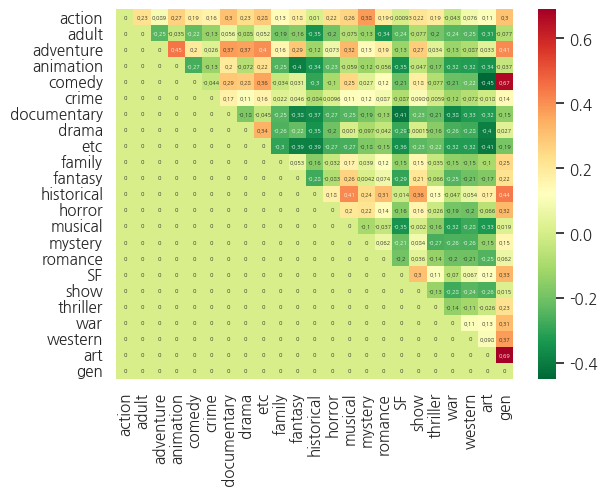

In [88]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r',annot_kws={"size": 4})
ax


In [89]:
# --- WEAT score 0.8 이상, -0.8 이하만 출력 ---
thr = 0.8
count = 0

print(f"--- |WEAT Score| >= {thr} 인 장르 조합 목록 ---\n")

# 매트릭스 전체 순회 (대각선 위쪽만 보면 되므로 j는 i+1부터 시작)
for i in range(len(genre_name) - 1):
    for j in range(i + 1, len(genre_name)):
        score = matrix[i][j]
        
        # 절대값(abs)이 기준치(thr)보다 큰지 확인
        if abs(score) >= thr:
            print(f"[{genre_name[i]}] - [{genre_name[j]}] : {score:.4f}")
            count += 1

if count == 0:
    print("해당 조건(0.8 이상)을 만족하는 조합이 없습니다.")
else:
    print(f"\n총 {count}개의 강한 편향성을 가진 조합을 찾았습니다.")

# --- WEAT score 중간 구간 (0.5 이상 0.8 미만) 출력 ---

lower_thr = 0.5  # 하한선
upper_thr = 0.8  # 상한선 (이전 단계에서 본 강한 편향의 기준)
count = 0

print(f"--- {lower_thr} <= |WEAT Score| < {upper_thr} 인 중간 편향 조합 ---\n")

for i in range(len(genre_name) - 1):
    for j in range(i + 1, len(genre_name)):
        score = matrix[i][j]
        
        # 절대값이 0.5 이상이고 0.8 미만인 경우만 출력
        if lower_thr <= abs(score) < upper_thr:
            print(f"[{genre_name[i]}] - [{genre_name[j]}] : {score:.4f}")
            count += 1

if count == 0:
    print("해당 구간의 조합이 없습니다.")
else:
    print(f"\n총 {count}개의 중간 편향성을 가진 조합을 찾았습니다.")

--- |WEAT Score| >= 0.8 인 장르 조합 목록 ---

해당 조건(0.8 이상)을 만족하는 조합이 없습니다.
--- 0.5 <= |WEAT Score| < 0.8 인 중간 편향 조합 ---

[comedy] - [gen] : 0.6678
[art] - [gen] : 0.6901

총 2개의 중간 편향성을 가진 조합을 찾았습니다.


# TF-IDF를 적용했을때 문제점은 중복된 값을 제거하더라도여전히 중복된 단어가 존재하였다.
이 문제점을 개선하기 위해서 아래와 같이 이미 다른 장르에 배정된 단어라면 스킵하여 중복을 제거 하였다.

In [ ]:
# 실험 2 중복 제

In [34]:
# 단어 사전(단어 리스트)를 미리 가져옵니다. (반복문 밖에서 한 번만 호출)
feature_names = vectorizer.get_feature_names_out()
all_top_words = []  # 첫 번째 루프에서 뽑은 단어들을 저장할 리스트 생성

# genre_name 리스트의 순서대로 반복합니다. (총 23회)
for i in range(len(genre_name)):
    
    # 1. 현재 장르(i번째)의 TF-IDF sparse matrix 가져오기
    m = X[i].tocoo()
    
    # 2. (단어인덱스, TF-IDF값) 쌍으로 묶기
    w = [[c, d] for c, d in zip(m.col, m.data)]
    
    # 3. TF-IDF 값이 높은 순으로 정렬 (내림차순)
    w.sort(key=lambda x: x[1], reverse=True)

    # 4.리스트에 저장 (Step 2에서 사용하기 위함)
    all_top_words.append(top_words_list)
    
    # 5. 결과 출력
    print(f"--- [{genre_name[i]}] 를 대표하는 단어들 ---")
    
    # 상위 100개 단어 출력 (단, 단어 개수가 100개보다 적을 경우를 대비해 min 사용)
    top_n = min(100, len(w))
    
    for k in range(top_n):
        # feature_names[단어인덱스] 로 실제 단어를 찾음
        print(feature_names[w[k][0]], end=', ')
    
    print('\n') # 장르별 구분을 위해 줄바꿈 2번

--- [action] 를 대표하는 단어들 ---
자신, 시작, 조직, 사건, 사람, 경찰, 친구, 세계, 요원, 목숨, 전쟁, 거대, 가족, 임무, 비밀, 살인, 사실, 남자, 위험, 범죄, 마약, 아버지, 복수, 한편, 죽음, 영화, 아들, 테러, 사랑, 납치, 마을, 위협, 상황, 세상, 인간, 보스, 최고, 작전, 동료, 형사, 여자, 공격, 음모, 발견, 시간, 계획, 지구, 아내, 특수, 마지막, 수사, 위기, 발생, 킬러, 인류, 과거, 탈출, 범인, 살해, 성공, 정체, 사고, 이상, 무기, 운명, 도시, 사이, 전투, 무술, 부대, 도움, 액션, 뱀파이어, 현장, 갱단, 게임, 암살, 정부, 싸움, 아이, 순간, 수행, 감옥, 정보, 의문, 대결, 세력, 전설, 박사, 명령, 동생, 결국, 존재, 추적, 영화제, 마피아, 전사, 인질, 학교, 제안, 

--- [adult] 를 대표하는 단어들 ---
남편, 성애, 자신, 관계, 남자, 섹스, 영화, 정사, 여자, 시작, 친구, 유부녀, 마음, 사랑, 에피소드, 아내, 이야기, 회사, 마사지, 결혼, 자위, 욕구, 지사, 흥분, 모습, 부부, 유혹, 생활, 사람, 사실, 사이, 유이, 성적, 여성, 서로, 한편, 행각, 유미, 생각, 아버지, 누나, 요구, 시간, 출장, 불륜, 애무, 직원, 마사, 새엄마, 아들, 만족, 유우, 성욕, 잠자리, 동생, 아이, 손길, 결국, 엄마, 직장, 육체, 운영, 점장, 자리, 행동, 가게, 거부, 사장, 속옷, 마코토, 고백, 언니, 행복, 선생, 부탁, 상대, 해소, 남성, 시호, 병원, 의붓아들, 코지, 다음, 욕망, 협박, 손님, 업소, 상사, 외로움, 선배, 방문, 목격, 주인공, 이후, 그동안, 미키, 장모, 혼자, 바람, 이혼, 

--- [adventure] 를 대표하는 단어들 ---
자신, 시작, 친구, 영화, 마을, 아이, 세계, 아버지, 사람, 여행, 가족, 세상, 윈치, 모험, 비밀, 이야기, 위험, 소년, 인간, 발견, 여정, 남자, 

In [37]:
import operator

# 1. 모든 장르의 (단어, 점수, 장르명) 데이터를 한 바구니에 담습니다.
all_candidates = []
feature_names = vectorizer.get_feature_names_out()

print("데이터 집계 중...")
for i in range(len(genre_name)):
    m = X[i].tocoo()
    # (장르인덱스, 단어인덱스) 쌍을 순회
    w = [[c, d] for c, d in zip(m.col, m.data)]
    
    # 각 장르별 상위 200개 정도만 후보로 등록 (속도 및 메모리 효율)
    w.sort(key=lambda x: x[1], reverse=True)
    
    for k in range(min(200, len(w))):
        word = feature_names[w[k][0]]
        score = w[k][1]
        genre = genre_name[i]
        
        # (점수, 단어, 장르) 튜플로 저장
        if word in model.wv: # Word2Vec에 있는 단어만
            all_candidates.append((score, word, genre))

# 2. 전체 데이터를 점수(TF-IDF)가 높은 순서대로 정렬합니다.
#    이렇게 하면 '가장 강력한 특징'을 가진 단어부터 자리를 잡게 됩니다.
all_candidates.sort(key=lambda x: x[0], reverse=True)

# 3. 단어를 배분합니다. (중복 방지)
genre_words = {g: [] for g in genre_name} # 결과 저장소
used_words = set() # 이미 배정된 단어 기록
n = 15 # 목표 개수

print("단어 배분 시작...")

for score, word, genre in all_candidates:
    # 1) 이미 목표 개수(15개)를 채운 장르는 스킵
    if len(genre_words[genre]) >= n:
        continue
        
    # 2) 이미 다른 장르에 배정된 단어라면 스킵 (중복 제거 핵심!)
    if word in used_words:
        continue
        
    # 3) 조건 만족 시 배정
    genre_words[genre].append(word)
    used_words.add(word)

# 4. 결과 출력
print("\n--- 최종 결과 ---")
for genre, words in genre_words.items():
    print(f"[{genre}] ({len(words)}개): {words}")

데이터 집계 중...
단어 배분 시작...

--- 최종 결과 ---
[action] (15개): ['조직', '요원', '목숨', '한편', '테러', '납치', '위협', '상황', '보스', '음모', '특수', '마지막', '킬러', '탈출', '무기']
[adult] (15개): ['남편', '성애', '관계', '섹스', '정사', '유부녀', '에피소드', '회사', '마사지', '자위', '욕구', '지사', '흥분', '유혹', '유이']
[adventure] (15개): ['아이', '여행', '세상', '윈치', '모험', '비밀', '위험', '소년', '여정', '신비', '보물', '부모', '원주민', '옥자', '위기']
[animation] (15개): ['애니메이션', '깨미', '페스티벌', '부문', '동물', '만화', '주인공', '경쟁', '왕국', '고고', '학생', '악당', '나무', '괴물', '바다']
[comedy] (15개): ['인생', '생각', '생활', '코미디', '파티', '배우', '하루', '매력', '밴드', '문제', '완벽', '삼순', '준비', '스타', '대학']
[crime] (15개): ['경찰', '범죄', '마약', '형사', '수사', '범인', '은행', '계획', '살해', '동료', '성공', '제안', '용의자', '마피아', '강도']
[documentary] (15개): ['영화', '다큐', '다큐멘터리', '이야기', '감독', '여성', '환경', '작품', '사회', '역사', '기록', '노동자', '동안', '카메라', '과정']
[drama] (15개): ['일상', '의도', '시절', '상처', '선생', '고향', '자살', '선택', '처음', '동네', '관심', '거리', '대신', '소개', '전주국']
[etc] (15개): ['영화제', '국제', '단편', '미디어', '독립', '연출', '이미지', '영작', '지하철', '청소

In [112]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 7.9 MB/s eta 0:00:00


워드 클라우드 생성 중...


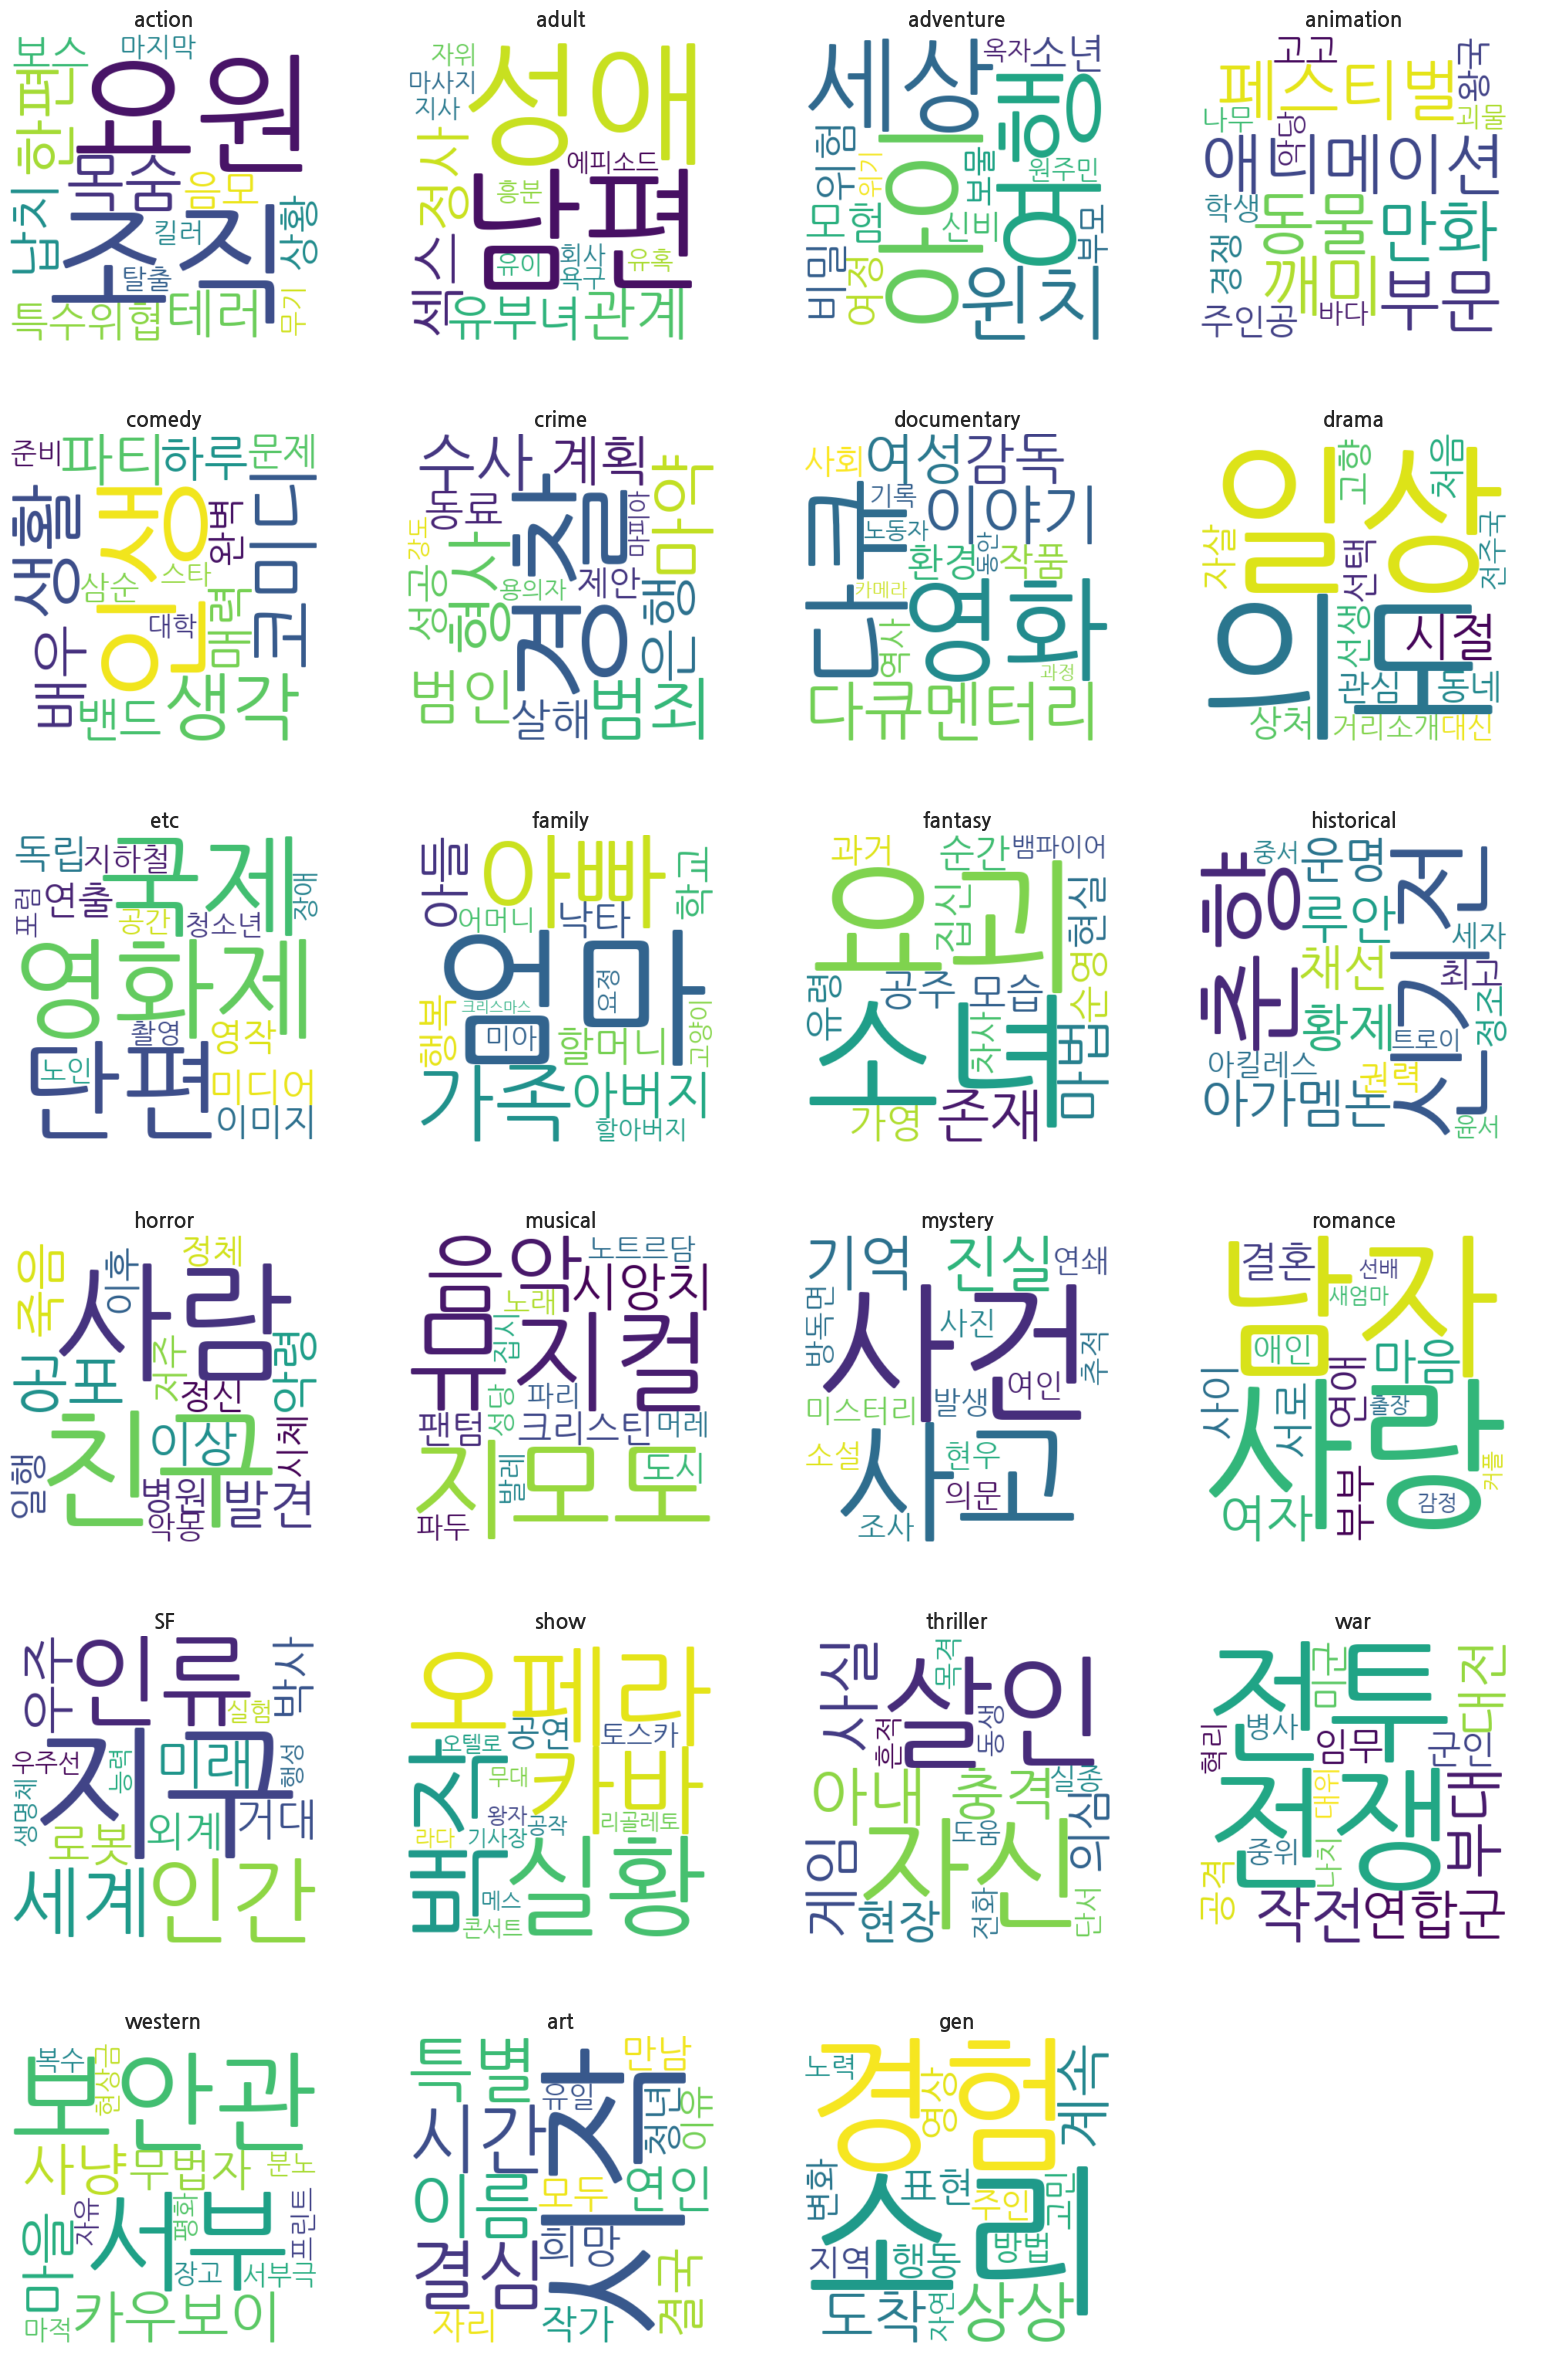

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
# 2. 그래프 설정 (6행 4열로 배치 -> 총 24개 공간 생성)
fig, axes = plt.subplots(6, 4, figsize=(20, 30))
plt.subplots_adjust(hspace=0.3, wspace=0.1)
axes = axes.flatten() # 2차원 배열을 1차원으로 펴서 인덱싱하기 쉽게 만듦

print("워드 클라우드 생성 중...")

# 3. 장르별 워드 클라우드 생성 및 출력
for i, (genre, words) in enumerate(genre_words.items()):
    
    # 단어가 없는 경우 처리
    if not words:
        axes[i].text(0.5, 0.5, "No Data", ha='center', va='center')
        axes[i].set_title(genre, fontsize=15, fontweight='bold')
        axes[i].axis('off')
        continue

    # 리스트에 있는 단어들을 공백으로 연결하여 하나의 문자열로 변환
    text = " ".join(words)

    # 워드 클라우드 객체 생성
    wc = WordCloud(
        font_path=font_path, 
        background_color='white', # 배경색
        width=400, 
        height=400, 
        colormap='viridis' # 색상 테마
    ).generate(text)

    # 이미지 출력
    axes[i].imshow(wc, interpolation="bilinear")
    axes[i].set_title(genre, fontsize=15, fontweight='bold')
    axes[i].axis('off') # 축 눈금 제거

# 남은 빈 서브플롯 제거 (23개 장르라 1칸이 남음)
for j in range(len(genre_words), len(axes)):
    axes[j].axis('off')

In [38]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [46]:
# 3단계: art와 gen의 인덱스 찾기
art_idx = genre_name.index('art')
gen_idx = genre_name.index('gen')

print(f"art_idx: {art_idx}")
print(f"gen_idx: {gen_idx}")

art_idx: 21
gen_idx: 22


In [91]:
X = np.array([model.wv[word] for word in genre_words['art']])
Y = np.array([model.wv[word] for word in genre_words['gen']])

for i in range(len(genre_name)-3):
    for j in range(i+1, len(genre_name)-3):
        A = np.array([model.wv[word] for word in genre_words[genre_name[i]]])
        B = np.array([model.wv[word] for word in genre_words[genre_name[j]]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [92]:
for i in range(len(genre_name)-3):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

action adult 0.0074618063
action adventure 0.23599842
action animation 0.41472048
action comedy 0.10243562
action crime 0.048186094
action documentary 0.35942203
action drama 0.12704858
action etc 0.3807057
action family 0.059885766
action fantasy 0.22778316
action historical 0.03146214
action horror 0.31562996
action musical 0.20204036
action mystery 0.5149373
action romance -0.09545629
action SF 0.5220083
action show 0.11365502
action thriller 0.13805793
action war 0.4835097
action western 0.07555523
action art 0.10678013
action gen 0.29845744
adult adventure 0.17456359
adult animation 0.543659
adult comedy 0.23115951
adult crime 0.0039474196
adult documentary 0.49655294
adult drama 0.30174765
adult etc 0.58327216
adult family 0.07238633
adult fantasy 0.23035422
adult historical 0.008440548
adult horror 0.24490206
adult musical 0.28542694
adult mystery 0.3385833
adult romance -0.47904187
adult SF 0.30053988
adult show 0.16079421
adult thriller 0.06377924
adult war 0.11948813
adult we

<Axes: >

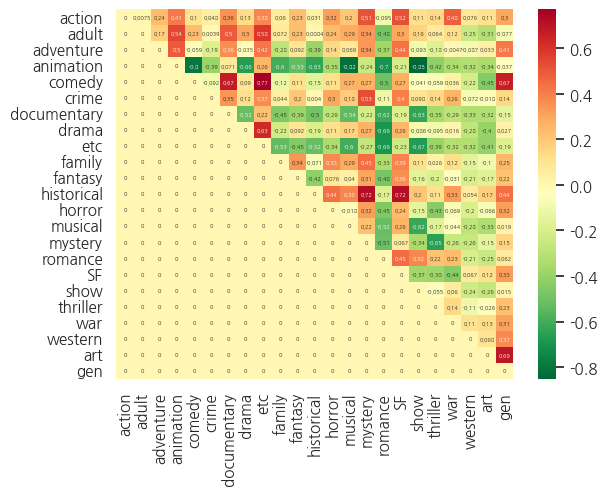

In [94]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r',annot_kws={"size": 4})
ax

In [95]:
# --- WEAT score 0.8 이상, -0.8 이하만 출력 ---
thr = 0.8
count = 0

print(f"--- |WEAT Score| >= {thr} 인 장르 조합 목록 ---\n")

# 매트릭스 전체 순회 (대각선 위쪽만 보면 되므로 j는 i+1부터 시작)
for i in range(len(genre_name) - 1):
    for j in range(i + 1, len(genre_name)):
        score = matrix[i][j]
        
        # 절대값(abs)이 기준치(thr)보다 큰지 확인
        if abs(score) >= thr:
            print(f"[{genre_name[i]}] - [{genre_name[j]}] : {score:.4f}")
            count += 1

if count == 0:
    print("해당 조건(0.8 이상)을 만족하는 조합이 없습니다.")
else:
    print(f"\n총 {count}개의 강한 편향성을 가진 조합을 찾았습니다.")

# --- WEAT score 중간 구간 (0.5 이상 0.8 미만) 출력 ---

lower_thr = 0.5  # 하한선
upper_thr = 0.8  # 상한선 (이전 단계에서 본 강한 편향의 기준)
count = 0

print(f"--- {lower_thr} <= |WEAT Score| < {upper_thr} 인 중간 편향 조합 ---\n")

for i in range(len(genre_name) - 1):
    for j in range(i + 1, len(genre_name)):
        score = matrix[i][j]
        
        # 절대값이 0.5 이상이고 0.8 미만인 경우만 출력
        if lower_thr <= abs(score) < upper_thr:
            print(f"[{genre_name[i]}] - [{genre_name[j]}] : {score:.4f}")
            count += 1

if count == 0:
    print("해당 구간의 조합이 없습니다.")
else:
    print(f"\n총 {count}개의 중간 편향성을 가진 조합을 찾았습니다.")

--- |WEAT Score| >= 0.8 인 장르 조합 목록 ---

[animation] - [musical] : -0.8201
[animation] - [show] : -0.8517

총 2개의 강한 편향성을 가진 조합을 찾았습니다.
--- 0.5 <= |WEAT Score| < 0.8 인 중간 편향 조합 ---

[action] - [mystery] : 0.5149
[action] - [SF] : 0.5220
[adult] - [animation] : 0.5437
[adult] - [etc] : 0.5833
[animation] - [comedy] : -0.7964
[animation] - [drama] : -0.6649
[animation] - [family] : -0.5986
[animation] - [fantasy] : -0.5315
[animation] - [historical] : -0.6304
[animation] - [romance] : -0.7037
[comedy] - [documentary] : 0.6706
[comedy] - [etc] : 0.7720
[comedy] - [romance] : -0.5001
[comedy] - [gen] : 0.6678
[crime] - [mystery] : 0.5255
[documentary] - [drama] : -0.5211
[documentary] - [musical] : -0.5407
[documentary] - [romance] : -0.6167
[documentary] - [show] : -0.6344
[drama] - [etc] : 0.6325
[drama] - [romance] : -0.6902
[etc] - [family] : -0.5311
[etc] - [historical] : -0.5195
[etc] - [musical] : -0.6003
[etc] - [romance] : -0.6914
[etc] - [show] : -0.6681
[historical] - [mystery] : 

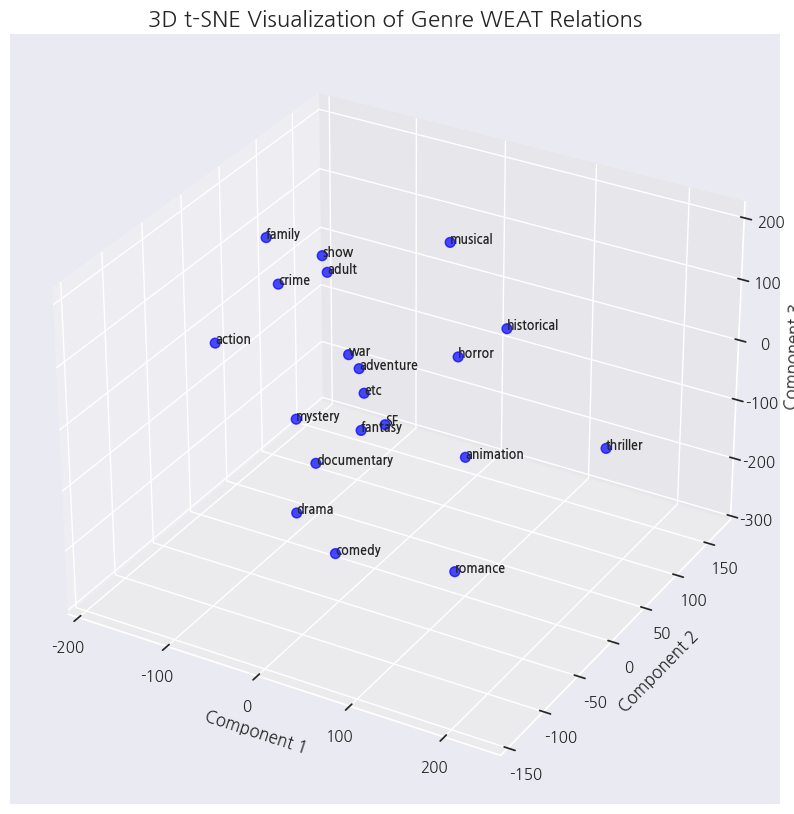

In [100]:
# t-sne
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 한글 폰트 관련

# (이전 코드에서 이미 matrix가 계산되었다고 가정합니다)

# 1. 매트릭스 대칭화 (t-SNE 입력 형식에 맞춤)
np_matrix = np.array(matrix)

# 유효한 데이터 크기에 맞추어 자르기
# 만약 for i in range(len(genre_name)-3)을 사용하셨다면, valid_size는 len(genre_name)-3 입니다.
# 그 외의 경우 (예: art, gen만 제외했다면 len(genre_name)-2) 상황에 맞게 조정해주세요.
valid_size = len(genre_name) - 3 
full_matrix = np_matrix[:valid_size, :valid_size]

# 대칭 채우기
for i in range(valid_size):
    for j in range(i + 1, valid_size):
        full_matrix[j][i] = -full_matrix[i][j]

# 2. t-SNE 모델 학습
# perplexity: 데이터 포인트 주변의 이웃 개수를 나타냅니다.
#             데이터 포인트 개수보다 작아야 하며, 보통 5~50 사이의 값을 사용합니다.
#             여기서는 데이터 개수(20개 내외)가 적으므로 작은 값을 유지합니다.
tsne = TSNE(n_components=2, perplexity=5, random_state=0, init='pca', learning_rate='auto')
X_embedded = tsne.fit_transform(full_matrix)

# 3. 시각화 (그림 축소 및 텍스트 크기 조절)
plt.figure(figsize=(6, 4)) # 그림 크기를 (8, 7)로 축소

# 산점도 그리기
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c='blue', alpha=0.6)

# 각 점에 장르 이름 붙이기
# fontsize도 10으로 줄여서 텍스트 겹침을 줄입니다.
for i in range(valid_size):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], genre_name[i], 
             fontsize=10, fontweight='bold') # 폰트 크기 10으로 축소

plt.title("t-SNE Visualization of Genre WEAT Relations", fontsize=14) # 제목 폰트 크기
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [103]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.0 MB/s eta 0:00:00


In [107]:
3D t-sne
import plotly.offline as pyo
import plotly.graph_objects as go

# 노트북 모드 초기화 (이 줄이 핵심입니다!)
pyo.init_notebook_mode(connected=True)

# --- 기존 그래프 코드 ---
fig = go.Figure(data=[go.Scatter3d(
    x=X_embedded_3d[:, 0],
    y=X_embedded_3d[:, 1],
    z=X_embedded_3d[:, 2],
    mode='markers+text',
    text=genre_name[:valid_size],
    textposition="top center",
    marker=dict(size=6, color=X_embedded_3d[:, 2], colorscale='Viridis', opacity=0.8)
)])

fig.update_layout(title="Interactive 3D t-SNE", width=900, height=700)
fig.show()
# renderer를 'iframe'으로 설정
fig.show(renderer="iframe")

# 혹은 'notebook'으로 설정
# fig.show(renderer="notebook")